#### CIS 9 - Lab 2
Topics: Pandas, Matplotlib

In [214]:
# Name: Pratyush Shanbhag

After finishing this module, you should be able to analyze the majority of data that you come across. Therefore, unlike the fictitious Lab 1 where a teacher could presumably hire a data scientist, in this lab you're going to see whether some 'real life' data can give you guidance on your potential career path.

The data comes from the California Employment Development Department (EDD) and the dataset is the Short-term Occupational Projections, which, based on the EDD website, give a 2-year projection of job outlook, and "_are produced for the State to provide individuals and organizations with an occupational outlook to make informed decisions on individual career and organizational program development_." The dataset is the job growth projection for 2021-2023 and is in the input file `employment.xlsx` that you download along with the Lab 2 jupyter notebook ([data source](https://data.edd.ca.gov/Employment-Projections/Short-Term-Occupational-Employment-Projections/guh4-bakw))

In [215]:
# Import modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. **Read data from the _employment.xlsx_ file into a DataFrame**.<br>
Then **print the number of rows and columns of the DataFrame and print the first 5 rows**

In [216]:
data = pd.read_excel("employment.xlsx")
print(f"Shape of DataFrame: {data.shape}")
print(f"First five rows of data:\n{data[:5]}")

Shape of DataFrame: (782, 18)
First five rows of data:
  Area Type   Area Name     Period  SOC Level  \
0     State  California  2021-2023          1   
1     State  California  2021-2023          2   
2     State  California  2021-2023          3   
3     State  California  2021-2023          4   
4     State  California  2021-2023          4   

  Standard Occupational Classification (SOC)               Occupational Title  \
0                                    00-0000           Total, All Occupations   
1                                    11-0000           Management Occupations   
2                                    11-1000                   Top Executives   
3                                    11-1011                 Chief Executives   
4                                    11-1021  General and Operations Managers   

   Base Quarter Employment Estimate  Projected Quarter Employment Estimate  \
0                          18004000                               19296200   
1      

2a. It looks like the first 3 columns (Area Type, Area Name, Period) have the same data for all rows.<br>
Write code to **confirm that the first 3 columns have the same data for all rows**.<br>
You should use a loop, don't copy and paste code 3 times.

In [217]:
for i in range(3):
    if data[data.columns[i]].nunique() == 1:
        print(f"All values in the {data.columns[i]} are the same")

All values in the Area Type are the same
All values in the Area Name are the same
All values in the Period are the same


2b. Now that we have confirmation that the dataset is for California and for the years 2021-2023,<br>
**delete the first 3 columns** since they don't add any value to the individual rows.<br>
Then **print the last 4 rows** of the DataFrame to check the updated DataFrame

In [218]:
data.drop(columns=data.columns[:3], inplace=True)
print(f"Last four rows of data:\n{data[-4:]}")

Last four rows of data:
     SOC Level Standard Occupational Classification (SOC)  \
778          4                                    53-7065   
779          4                                    53-7081   
780          4                                    53-7121   
781          4                                    53-7199   

                            Occupational Title  \
778                 Stockers and Order Fillers   
779  Refuse and Recyclable Material Collectors   
780          Tank Car, Truck, and Ship Loaders   
781         Material Moving Workers, All Other   

     Base Quarter Employment Estimate  Projected Quarter Employment Estimate  \
778                            273000                                 290400   
779                             16000                                  16900   
780                              1200                                   1200   
781                             10000                                  10700   

     Numeric Chang

3. Some columns have data that can be derived from other columns, or have more general data:
- SOC Level is more general than the more detailed Standard Occupational Classification (SOC)
- Numeric Change + Exits + Transfers => Total Job Openings
- Projected Quarter Employment Estimates - Base Quarter Employment Estimates => Numeric Change
- Numeric Change is directly related to Percentage Change

Therefore, we can ***delete SOC Level, Numeric Change, Exits, Transfers, Percentage Change, Projected Quarter Employment Estimate***.<br>

In [219]:
data.drop(columns=["SOC Level", "Numeric Change", "Exits", "Transfers", "Percentage Change", "Projected Quarter Employment Estimate"], inplace=True)

4. From the previous step, it's obvious that the longer column labels are cumbersome.<br>
***Simplify the column names to: SOC, title, base, openings, hour, annual, education, experience, and training***<br>
Then ***print the first 5 rows*** to verify the updated DataFrame.<br>
You should not have to type in all the original column labels.

In [220]:
data.rename(columns={"Standard Occupational Classification (SOC)": "SOC", "Occupational Title": "title",
                     "Base Quarter Employment Estimate": "base", "Total Job Openings": "openings",
                     "Median Hourly Wage": "hour", "Median Annual Wage": "annual",
                     "Entry Level Education": "education", "Work Experience": "experience",
                     "Job Training": "training"}, inplace=True)
print(f"First five rows of data:\n{data[:5]}")

First five rows of data:
       SOC                            title      base  openings   hour  \
0  00-0000           Total, All Occupations  18004000   5369220  23.34   
1  11-0000           Management Occupations   1261300    288310  62.77   
2  11-1000                   Top Executives    303700     67740   0.00   
3  11-1011                 Chief Executives     42700      6850   0.00   
4  11-1021  General and Operations Managers    257700     60430  57.48   

   annual          education experience training  
0   48532                NaN        NaN      NaN  
1  130574                NaN        NaN      NaN  
2       0                NaN        NaN      NaN  
3       0  Bachelor's degree   ≥5 years     None  
4  119561  Bachelor's degree   ≥5 years     None  


5. From the output of the above step, observe that there are NaNs in the DataFrame.
***Print the number of NaNs for each column***<br>
The output should be the column names and the corresponding count of NaNs in the column.

In [221]:
for i in data.columns:
    print(f"Count of NaNs in the {i} column: {data[i].isna().sum()}")

Count of NaNs in the SOC column: 0
Count of NaNs in the title column: 0
Count of NaNs in the base column: 0
Count of NaNs in the openings column: 0
Count of NaNs in the hour column: 0
Count of NaNs in the annual column: 0
Count of NaNs in the education column: 117
Count of NaNs in the experience column: 117
Count of NaNs in the training column: 117


6. Each entry of the SOC column is a text string made of 2 fields: broad occupation number - detailed occupation number<br>
The broad occupation number describes a general field of employment, such as management, tech, education..., and the detailed occupation is the specific job title within the field.<br>

***Change each SOC value to keep the broad occupation number only***, discarding the dash and the detailed occupation number. Example: 11-1021 will become 11<br>
Then use the Jupyter Notebook print (not Python print() function) to ***print the DataFrame*** to check the updated SOC.<br>

_Ideally you don't need to write a loop for this step, but if you need to, you can write a loop_

In [222]:
data["SOC"] = data["SOC"].str[:2].astype(int)
data

,SOC,title,base,openings,hour,annual,education,experience,training
0,0,"Total, All Occupations",18004000,5369220,23.34,48532,NaN,NaN,NaN
1,11,Management Occupations,1261300,288310,62.77,130574,NaN,NaN,NaN
2,11,Top Executives,303700,67740,0.00,0,NaN,NaN,NaN
3,11,Chief Executives,42700,6850,0.00,0,Bachelor's degree,≥5 years,None
4,11,General and Operations Managers,257700,60430,57.48,119561,Bachelor's degree,≥5 years,None
...,...,...,...,...,...,...,...,...,...
777,53,"Packers and Packagers, Hand",84400,27150,14.61,30374,No formal educational credential,None,Short-term on-the-job training
778,53,Stockers and Order Fillers,273000,104410,15.56,32371,High school diploma or equivalent,None,Short-term on-the-job training
779,53,Refuse and Recyclable Material Collectors,16000,5260,27.45,57085,No formal educational credential,None,Short-term on-the-job training
780,53,"Tank Car, Truck, and Ship Loaders",1200,290,26.02,54120,No formal educational credential,None,Short-term on-the-job training


---

Now that we've cleaned up the DataFrame, first we look at the general job trends.<br>

<u>Part A: education level and job titles</u>

7. There are 8 different education levels in the dataset.<br>
***Show the education levels and the number of jobs that require that level of education***<br>
The output should be _sorted by number of jobs_:<br>
`Level A      smallest number
  ...
 Level X      largest number`

In [223]:
ed_df = data.groupby(["education"])["openings"].sum().reset_index().sort_values(by="openings")
ed_df

,education,openings
4,Master's degree,77680
2,Doctoral or professional degree,86010
0,Associate's degree,88410
7,"Some college, no degree",124760
6,Postsecondary non-degree award,274790
1,Bachelor's degree,1050990
5,No formal educational credential,1799370
3,High school diploma or equivalent,1840190


8. ***Show all the job titles for one level of education***<br>
Use your choice of the level of education, and print 2 job titles per line, separated by comma.<br>
Here are the first few lines of output for Bachelor's degree:<br>
`Jobs requiring a Bachelor's degree:
Chief Executives, General and Operations Managers
Legislators, Advertising and Promotions Managers`

_You only need to show 1 level of education for the lab, but feel free to change to other levels to see what jobs are at other levels_

In [224]:
print("Jobs requiring a Bachelor's degree:")
df_b_job = data.loc[data["education"] == "Bachelor's degree"]["title"].unique()
for i in range(np.shape(df_b_job)[0]):
    if i%2 == 0:
        print(f"{df_b_job[i]}, ", end="")
    else:
        print(df_b_job[i])

Jobs requiring a Bachelor's degree:
Chief Executives, General and Operations Managers
Legislators, Advertising and Promotions Managers
Marketing Managers, Sales Managers
Public Relations and Fundraising Managers*, Administrative Services and Facilities Managers*
Computer and Information Systems Managers, Financial Managers
Industrial Production Managers, Purchasing Managers
Compensation and Benefits Managers, Human Resources Managers
Training and Development Managers, Construction Managers
Education Administrators, Preschool and Childcare Center/Program, Architectural and Engineering Managers
Medical and Health Services Managers, Social and Community Service Managers
Personal Service Managers; Entertainment and Recreation Managers, Except Gambling; and Managers, All Other*, Buyers and Purchasing Agents*
Compliance Officers, Cost Estimators
Human Resources Specialists, Labor Relations Specialists
Logisticians, Management Analysts
Meeting, Convention, and Event Planners, Fundraisers
Comp

<u>Part B: education level and salary</u>

Some of the rows have an hourly pay but no annual pay. We want to calculate the annual pay for these rows.<br>

9a. ***Show the index of the rows with no annual pay but have hourly pay.***<br>
A pay value of 0 means that there is no data.

In [225]:
indices = np.where(data["annual"] == 0)
indices

(array([  2,   3,   6,  11,  21,  22,  35,  51,  65,  78,  84,  89, 104,
        119, 129, 136, 146, 156, 160, 175, 180, 185, 190, 198, 216, 227,
        232, 237, 243, 256, 257, 261, 263, 264, 265, 275, 284, 302, 306,
        307, 309, 311, 312, 313, 316, 334, 338, 343, 347, 358, 363, 365,
        370, 377, 380, 383, 391, 396, 402, 405, 409, 415, 418, 421, 428,
        431, 437, 440, 442, 449, 452, 458, 464, 467, 476, 478, 480, 489,
        501, 507, 519, 524, 534, 536, 543, 547, 549, 575, 582, 590, 596,
        598, 609, 624, 644, 646, 654, 663, 681, 685, 697, 703, 711, 740,
        743, 744, 749, 757, 761, 764, 769]),)

9b. Use the index values from step 9a, ***calculate and store the annual pay for those rows*** in the DataFrame<br>
Then ***print the annual pay of those rows***

The annual pay = hourly pay * 40 * 52

In [226]:
for i in indices:
    data.loc[i, "annual"] = data.loc[i, "hour"] * 40 * 52

10. Follow the steps below to plot the education vs salary to see if there are correlations<br>

10a. Prepare data to be plotted:
- ***Create a new DataFrame with 2 columns from the curent DataFrame: _annual_ salary and _education_ level***
- ***Remove rows with NaN***
- ***Remove rows with no annual salary***
- ***Change the education level to numeric data***

Then ***print the new DataFrame*** to check your work

In [227]:
salary_vs_ed = data[["annual", "education"]].copy()
salary_vs_ed.dropna()
salary_vs_ed.drop(salary_vs_ed[salary_vs_ed["annual"] == 0].index, inplace=True)
ed_lvl = {"No formal educational credential": 0, "High school diploma or equivalent": 1, "Some college, no degree": 2,
          "Associate's degree": 3, "Bachelor's degree": 4, "Postsecondary non-degree award": 5,
          "Master's degree": 6, "Doctoral or professional degree": 7}
salary_vs_ed["education"].replace(ed_lvl, inplace=True)

10b. Use the <u>proper</u> type of plot to ***plot the correlation between education level and salary***<br>
The plot should have:
- a title
- education levels on one axis and salaries on the other axis
- all labels must be clearly shown: no overlapping labels, font size must be readable

[]

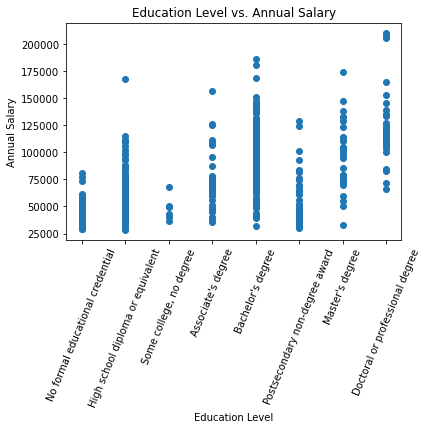

In [236]:
plt.title("Education Level vs. Annual Salary")
plt.xlabel("Education Level")
plt.ylabel("Annual Salary")
plt.xticks(np.arange(8), ed_lvl.keys(), rotation=67.5)
plt.scatter(salary_vs_ed["education"], salary_vs_ed["annual"])
plt.plot()

10c. Data visualization can sometimes tell a story better than analyzing columns of numbers.<br>
***Create a Raw NBConvert cell to describe any pattern you see from the plot***

11. The plot of step 10 shows that there are a few jobs which pay really well, above $200,000/yr median salary.<br>
***Print the job titles for jobs that are above 200,000 annual salary.***

<u>Part C: education and salary of top 2 highest paid fields</u>

12. ***Show the SOC and the median annual salary of each SOC***<br>
The output should be unique SOC numbers and corresponding median salaries, _sorted by median salaries_

13a. Looking at the output of step 12, you can see the SOC of the top 2 median salaries.<br>
Using these 2 SOC, ***create a DataFrame of all rows that have the 2 SOC***<br>
Then ***print the new DataFrame*** (use Jupyter Notebook print)

13b. Working with the new DataFrame, ***remove all rows that have no annual salary and all rows with NaN***

14a. ***Select the 10 rows with the highest annual salary***<br>
Then ***print the title, education, and experience columns of these 10 rows***

14b. What do you observe about title, education level, and experience of these jobs?<br>
***Create a Raw NBConvert cell for your answer***

15. Now we find the jobs with the most expected job openings in 2021-2023.<br>
***Select the 10 rows with the highest job openings***<br>
Then ***print the title, job openings, annual salary, education, and experience columns of these 10 rows***

16. Now we look at jobs in the tech sector, which has SOC 15.<br>
***Create a DataFrame with rows that have SOC 15***, then ***print the DataFrame***

17. Create a plot with 2 subplots (use the <u>appropriate</u> type of plots): 
- Subplot 1: ***Plot the job title and the annual salary of each job***
- Subplot 2: ***Plot the job title and the job openings of each job***

The 2 subplots are lined up top and bottom (vertically)<br>
The salary and the job openings _must be sorted_ in the subplots<br>
The job titles are long, make sure you use a font size that's readable (and choosing the appropriate way to plot will make the job titles more readable)<br>
Adjust the size of the plot and the distance between the 2 subplots so there's no overlap

_Note that you need to create 1 plot with 2 subplots. Don't create 2 different plots_

Hopefully the analysis work you've done shows that you're already in or heading towards a promising career.